# EDA: Airco

1. Multiplying the signal in the audioplayer leads to clipping, reducing clarity

## Load functions

In [1]:
using PyPlot
using WAV
using Base64
using Compat
using DSP
using Distributions
using FFTW



include("../functions/preprocessing.jl")
include("../functions/auxiliary/audioplayer.jl")
include("../functions/auxiliary/workflow.jl")
include("../functions/auxiliary/warpedfilter.jl")
include("../functions/auxiliary/fourier.jl")
;

## Load speech signal

In [2]:
# signal preprocessing
sound_file = "../data/airco.wav"         # specify sound location
;

In [3]:
x, fs = wavread(sound_file, format="native")
fs = Int(fs)
x = squeeze(x .- mean(x))
x = resample(x, 16000/fs)
t = (1:length(x))/16000

println("fs: "*string(fs)*" Hz  ---  number of samples: "*string(length(x))*"  ---   duration: "*string(length(x)/fs)*" sec")
audioplayers(x/maximum(x), fs=fs)
;

<source src="data:audio/wav;base64,UklGRjw1BwBXQVZFZm10ICgAAAD+/wEAgLsAAADuAgAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQA1BwBofnc5RZ98OgQ5FLoyGNg4ZP7eNxnNPLr9hJk4GLAKO1MnZTrs63S5WgL2OnuVqTlZ5gm7M74SuozNxTlpFYK6vvNiu6O2VDrNhPu7SwL/OhEsxTvVLOK8P7SevAfqGDtNQfM8ysNmPbjHhz0UaQQ8iMx5vTNtnb0BvFC9IPo6PGXMFDyN3f48PSQQPbr4jTvgVbm7AMb/u0lEX73JabG9KKF+vU9OhL33M7q8f1PiO6CDiT0ciuo9+JvgPQt0xj2cFtg9ao5zPbklPT0R9FY8apuPvVHY7L0TabW9B/qRve5oV712zjM915n/Pfje+z29rYE9xukFvPVSxr01Yaa913ODvXlfpL1TCzq9EbP1vOU+U73alFG91jhGvcUxQr1ckLy88kiTvEKi2Lxy9B69sByQvKhCij0MhiQ9VZYOPNAPyLuUK1E8NYK1PTx7mT2ji888ZqvGPBlZgbtKyhq9tc2jvdZDCr0VhFm7eGLaPNG9ZT0xz4w9HyXSPY0v1T3GfsE9FeSsPTqAkT1OrbE9A8UFPW2/bby9n42988qivSWu0b0zf7W97imKu2l3Yjy1MOk7KlhiPOBcFr3RdFG9Q5KZvci4WL2uQhQ8P7p3PeOsTT2VpYY9C7xqPfFBwTzbYKO8i03ZvUHvF760Hse9YmSTvZPdPL3Ujz49bI+2Pelkvz1SaMk9DaXQPV5niT0x5cO87hOsvbxbpr1Ic3u9LuGpvBAYlj09eTc+pGdjPt4CaT7ne0g+idYEPtVZCT04f8i9KdpAvtL8LL5KbMO9dqoIvaGMh7uWN0S88ImrPK2BXL10Saa9vAsDvl6RGb705Tu+JRNZvlz+P76z1B2+AUp7vXMKpTylnKQ9UH7cPSK6wj0edIw9kbUCvKzsQr1t5fW9j1ZKvt/8br6NFUO+xt4Tvv+99L0XLsy82e77PPnmRj3FHI89suaAPRwCmj0ce+Q9dxUePhV4Qj5jLFY+/IhKPjz82D2jHAE9AeEQPMFWG73xFiy95VMYvT5NRD3/pOw9grgKPvj2Oj4aLEk+8HckPk94VD2X6tY8UgeEvRDiOb6pY3y+/JuIvslUf74RuTe+qQETviBwCb4WKeS9xA+svVKNab0ABV69VHLHvH8e0Lyq6KG9ExUCvh5Cu70V7qG93p+tvXAPLr1batw8z4bBPdZezj3D5AU+PtQtPoQfFj6ZJco9rmOFPROioj2nPRI+eANZPl6qaz5c5nk+cR+HPgjwcz6MZkg+HXj0PcINuj1oyx49wm1QPTLLnj0947U9HzkGPn4gAT5F4QI+Di7yPc//Bz5JgSw+WbEwPlBNVz4xaVQ+bIc5PpjbFz5i/xE+MU4OPl2JCD53sAo+/BzBPQNnHj3yTE28NrCrvLFzTb3QkLC93zySvYTtY73rmXu9KJKbvaW/0r3hdhu+cFZMvvYSS76TAlu+tXiBvnbejb5+cKG+vgmvvgtjpL4NUYW+QaxovpRRS76ux0O+8r4jvrrYc77xU5++Olitvpkiwr4Ds+C+NaPSvoo/yr71y66+CLOGvu4mY76opx2+Awv2vfDiCr7CLBy+f03UvShHWL0V1Ye8a+sZvNt2SDsBgjA9w3nQPUzHPT4rhHU+/GWHPlX4bz5PjQ4+xWO6PRZiOT32X7Q9J6XvPSUHQj4oL2s+iyt2PmRRfD69tYA+PzZ5PtrDfD531Ek+C+oHPohQqT0ZSo095WWYPcqLkT3qRrI94/QFPumaED7QIdk9BPbhPF1K1Dzh8589Y56TPb1rfz23/Vg9c9JOvGZidr1H+Ve92ZFrvGdejDxrMTA9TioHPbf1fz3YGqc9NrnePcEGNz5fzWY+FcpwPtV4XT7HwX8+1R2CPrItij6nu3Q+E041PogsIz6MUR8+jgNEPgoZMz5LCCQ+uvRlPvo7ez7mMYc+bZ+MPgVIfD5ei4c+X06XPmCRoD5vdI8+jl4tPnMdrT2FPUo9/E8Mur7HDb3my8S8rNJHvWNcY712aN+94WX2vdbcub3ms529XV+Uvauonb0pnQG+axxdvgWYbL6UQIy+ZI+rvgNv1743f9O+0f62vquFt745Hpq+6OVVvlUxLr790fm9a7oZvQiX57zDb3y9L9+Dvdr1JL1XJGm9Z9i/vTPB0L1m/eO9HwkMvnXbwL1Jgas8ZquiPTfqvj3mw4k9DmQ6PUefMD1pRI28LANLvZ1rbr2cxle9SYKCvIJXS7sxJTS9Ziyvvd2BTL2P2/g85j7iPKWPBzubWTu7yBRvvU88nr0W6DG9bR1svZNayL3/SRG+MULJvYZ3E702brO8qE/bvAoLAbwWcg+96GPWvXxIML7LTYK+17VwvumUcb7fz1K+NxwFvk19yb3GSa+9TwfZvYt5zr1TUhG+WmqBvnGUpr71l6K+jiqkvvMNjr6gr1q+kgxLvlk+Nb62tji+H8VOvhkMRL4LoCC+qnj+vc6Pj70Svmq8UJ1OPDctYD2ITNs94XHmPeHv8T1pvaw9p441PYUujrz3D4C9DUU1vWswOzym7889BZbuPfDTPD7wX4M+O8qcPkO4rD4owaw+4au0PoB8vz71jLs+G3O8PpGO1T5zCro+UoCxPnY6rj7bvps+DFqMPjxubz7RvDk+OiVDPp1HZT7OemY+yl5XPkH6Uz4XhFA+EVEmPrs/kD0VFaA7nGahvTDrUr6pTJG+aVWovnRGor4y3Ie+iZ5BvghtI7778QW+fMLzvcwdob30KGi9S015vXN97L10HUO+Ih+Kvhcqo75b78y+rs3Qvr1Gnr6vmEi+4RiDvSx5qDzQMKI9zzcAPnd4CT7GKAI+LFC5PdZHyTyWEqu8ObCsvMeRebx+AzK8YRgMvTTVUL1DiiQ8HQK1PRtpDz7kyFc+I0xsPj+yRj6icCE+Ld/IPSD0yD2qBKQ9cLKJPOIAY72SMam9nQ1lvYGdhL3Li0S9MVQsvbgAlL2bdpi9A6CjvVQbyb3ukmG+vJmHvp30ir7/I4a+b3OJvk/tir48Aoy+80p8vtOSer76yTm+hZQZvo//772ElJS9XkSvvbrt4r2QQQm+p1ixvbhnd72spmi9RuCKvZqnab0M3UK8Tjq9PD/Wejmb7r683VWNvS9Bhb1pFQ29lr17vC1w1Dspcho5g3rmvHRcWb1n8RW9WIe+u7HkNbwvUWq7SsURPZRvqD0eq589pnE1Pn2yXT44Yjs+yoEbPs+VCj7r+NA942+XPSUWUD1cUP47MGK9vNe9XL2/C2u9IFxwvbsui73sYjq9pUEsvQO8Kr2OhSi9V5GrvZVADb4gCCq+ckwZvkXXBr4pwK+9pgKGvL/eGj3Yvp49dS/xPWgTJD4UaF4+G7BNPgmtyj1ARck7e3YEvZR8obxP+E48ELnTPVrsRT7ab1w+qtyVPriXwz6GVNY+sW7NPq1Cvz5NMLg+9+23PiIkuj7LIMg+gWTAPtfiyT67AMQ+1MvMPjCU8T6zHwI/6Gr5PgmVyT4TB7k+xojCPvnYrD6ihoE+BRBLPs7zIT5yoRI+Ii44PstNgD5Zx40+pqRZPlO97z3Mfzs9J+bqPEPtu7xLLe29dYguvvC+Xb4+HIO+D1Byvj7kDr7IoK69C9ncvQj27b3xhNi9cyzHveyy073ulxC+jGBavqWepL4tn8G+wAW0vtKVxL4Rtcy+bQfDvumWob6+uYS+REohvv2Mpr2m86S9F9l3vVL4Dr1x+ce7VBKIuyndd7zncFC912+HvZCsibyAkoA9pE3CPWfUlz2fuAk+oiVPPnCXgj6QFKY+LumqPi7pkj7SkYk+kwtrPqMvdD4mwl0+Xm0ePmqLuD1Syek8wgbkPGrbdD0eRYE9HIImPY6YgT3oeoI9L44aOu0PA70kl

fs: 48000 Hz  ---  number of samples: 118080  ---   duration: 2.46 sec


## Plot signal

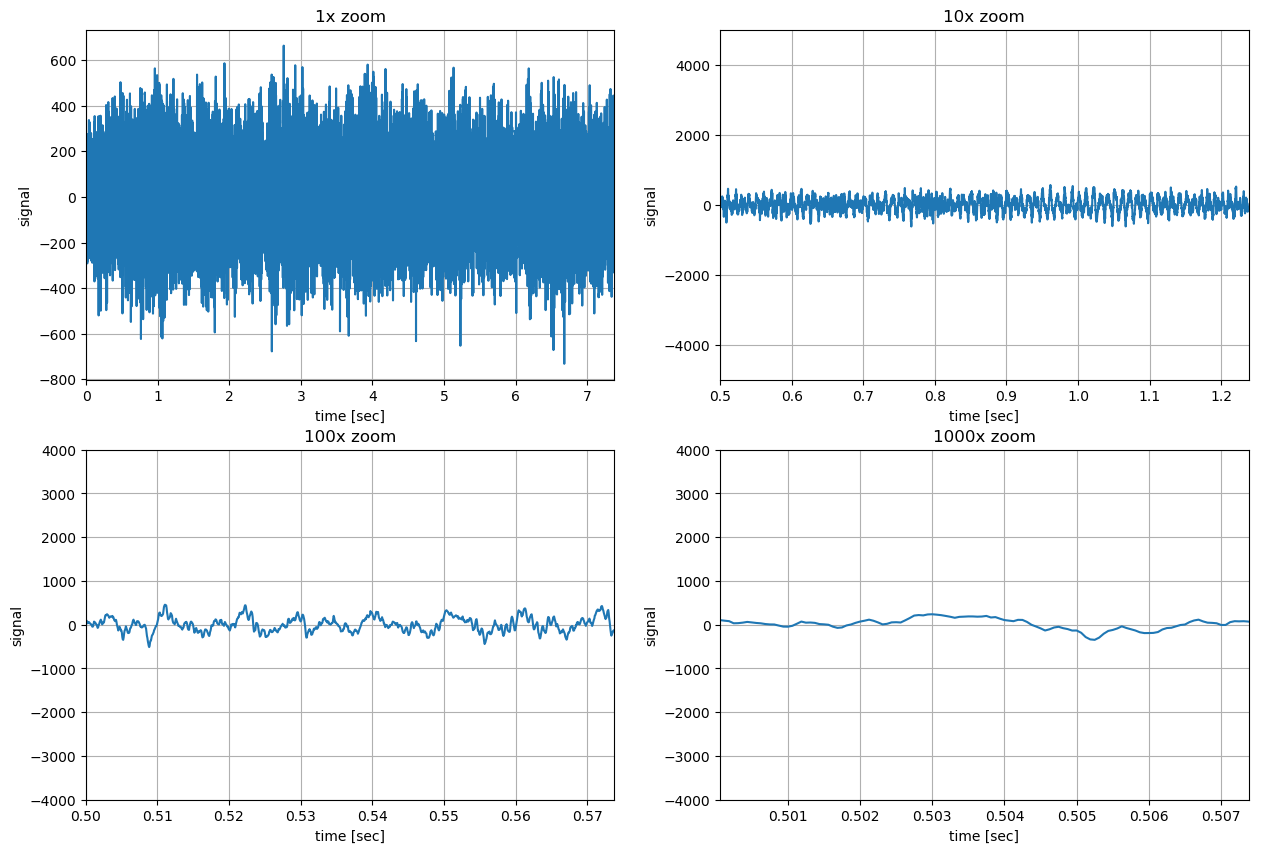

In [4]:
_, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,10))

ax[1,1].plot(t, x), ax[1,1].set_xlim(minimum(t), maximum(t)), ax[1,1].set_title("1x zoom"), ax[1,1].set_xlabel("time [sec]"), ax[1,1].set_ylabel("signal"), ax[1,1].grid()
ax[1,2].plot(t, x), ax[1,2].set_xlim(minimum(t)+0.5, maximum(t)/10+0.5), ax[1,2].set_ylim(-5000, 5000), ax[1,2].set_title("10x zoom"), ax[1,2].set_xlabel("time [sec]"), ax[1,2].set_ylabel("signal"), ax[1,2].grid()
ax[2,1].plot(t, x), ax[2,1].set_xlim(minimum(t)+0.5, maximum(t)/100+0.5), ax[2,1].set_ylim(-4000, 4000), ax[2,1].set_title("100x zoom"), ax[2,1].set_xlabel("time [sec]"), ax[2,1].set_ylabel("signal"), ax[2,1].grid()
ax[2,2].plot(t, x), ax[2,2].set_xlim(minimum(t)+0.5, maximum(t)/1000+0.5), ax[2,2].set_ylim(-4000, 4000), ax[2,2].set_title("1000x zoom"), ax[2,2].set_xlabel("time [sec]"), ax[2,2].set_ylabel("signal"), ax[2,2].grid()
;

## Plot signal distribution


Laplacian distribution:
$$ f(x \mid \mu, \ b) = \frac{1}{2b}e^{-\frac{\| x-\mu \|}{b}} $$
with sufficient statistics
$$\mu = \frac{1}{N}\sum_{n=1}^N x[n]$$ 
$$b = \frac{1}{N}\sum_{n=1}^N \| x[n] - \mu \|$$ 

In [5]:
Laplace(x, μ, b) = 1/2/b*exp.(-abs.(x .- μ)/b)
Laplace_ss_μ(x) = mean(x) 
Laplace_ss_b(x, μ) = 1/length(x)*sum(abs.(x .- μ))

Laplace_ss_b (generic function with 1 method)

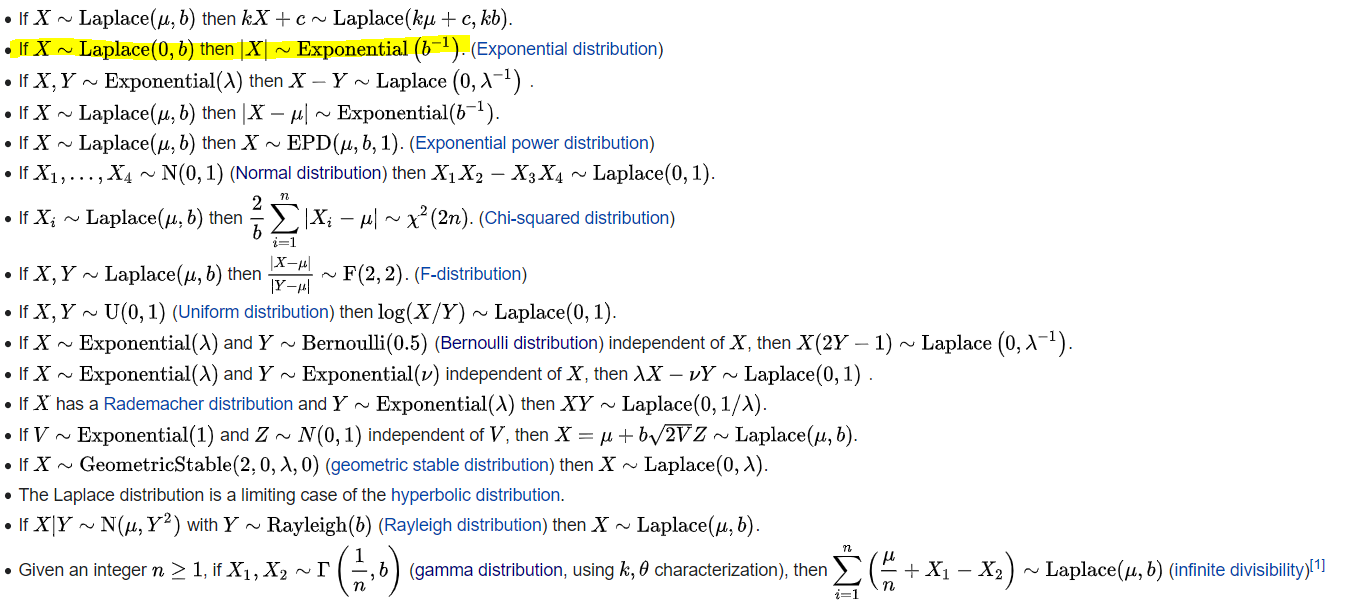

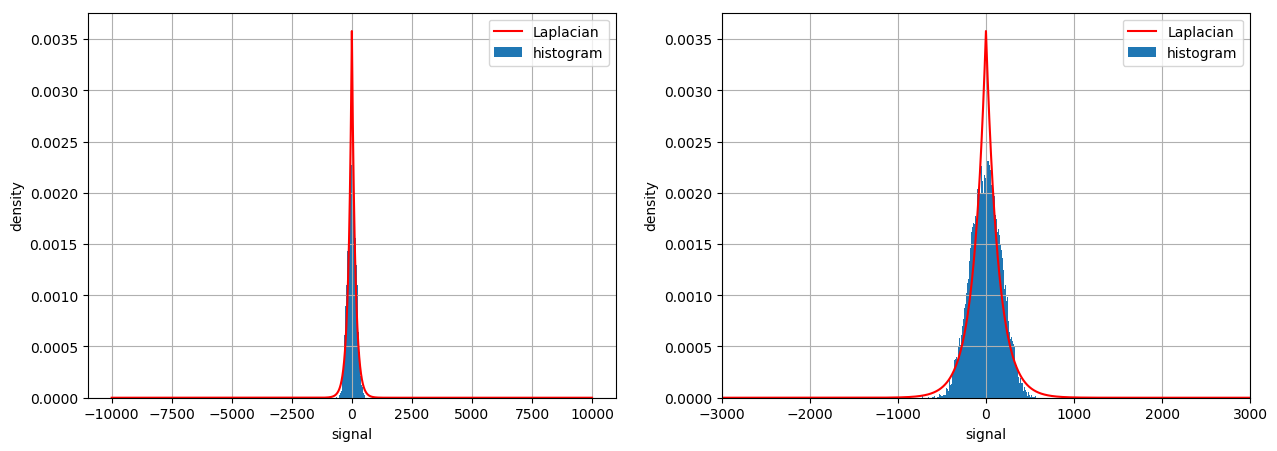

In [6]:
# create subplots
_, ax = plt.subplots(ncols=2, figsize=(15,5))

# plot histogram of speech signal
ax[1].hist(x, bins=1000, density=true, label="histogram"), ax[1].grid(), ax[1].set_xlabel("signal"), ax[1].set_ylabel("density")
ax[2].hist(x, bins=1000, density=true, label="histogram"), ax[2].grid(), ax[2].set_xlabel("signal"), ax[2].set_ylabel("density"), ax[2].set_xlim(-3000, 3000)

# plot laplacian distribution with parameters estimated from signal
ax[1].plot(-10000:10000, Laplace(-10000:10000, Laplace_ss_μ(x), Laplace_ss_b(x, Laplace_ss_μ(x))), color="red", label="Laplacian")
ax[2].plot(-10000:10000, Laplace(-10000:10000, Laplace_ss_μ(x), Laplace_ss_b(x, Laplace_ss_μ(x))), color="red", label="Laplacian")
ax[1].legend(), ax[2].legend()
;

Super Gaussian distribution:
$$ f(x \mid \mu, \ b) = \frac{1}{2b}e^{-\frac{\| x-\mu \|^p}{b}} $$
with sufficient statistics
$$\mu = \frac{1}{N}\sum_{n=1}^N x[n]$$ 
$$b = \frac{1}{N}\sum_{n=1}^N \| x[n] - \mu \|^p$$ 

In [7]:
SGaussian(x, μ, b, p) = 1/(abs(x[1]-x[2])*sum(exp.(-abs2.(x .- μ).^p/(b))))*exp.(-abs2.(x .- μ).^p/(b))
SGaussian_ss_μ(x) = mean(x) 
SGaussian_ss_b(x, μ, p) = 1/length(x)*sum(abs2.(x .- μ).^p)

SGaussian_ss_b (generic function with 1 method)

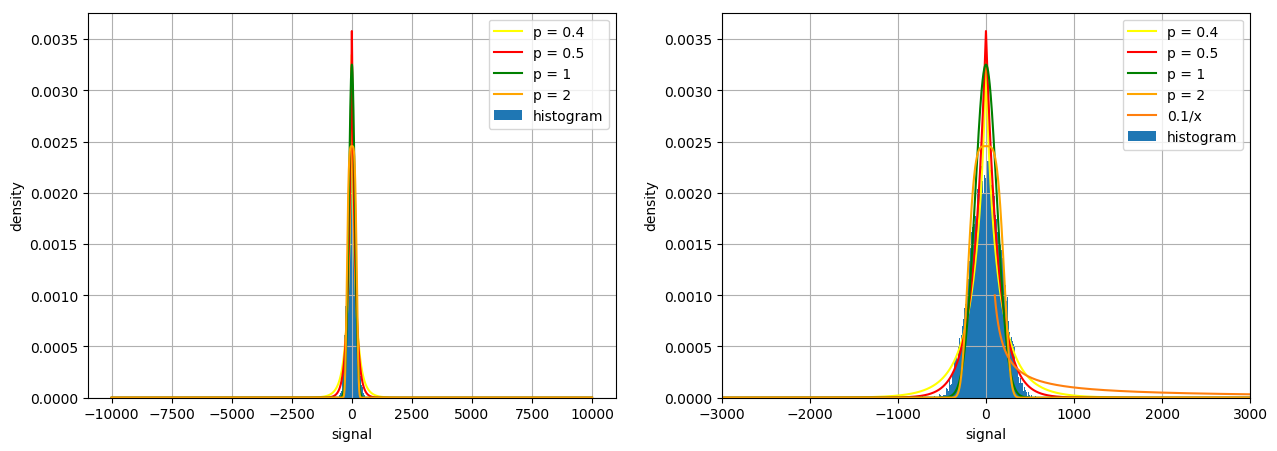

In [8]:
# create subplots
_, ax = plt.subplots(ncols=2, figsize=(15,5))

# plot histogram of speech signal
ax[1].hist(x, bins=1000, density=true, label="histogram"), ax[1].grid(), ax[1].set_xlabel("signal"), ax[1].set_ylabel("density")
ax[2].hist(x, bins=1000, density=true, label="histogram"), ax[2].grid(), ax[2].set_xlabel("signal"), ax[2].set_ylabel("density"), ax[2].set_xlim(-3000, 3000)

# plot supergaussian distribution with parameters estimated from signal
ax[1].plot(-10000:10000, SGaussian(-10000:10000, SGaussian_ss_μ(x), SGaussian_ss_b(x, SGaussian_ss_μ(x), 0.4), 0.4), color="yellow", label="p = 0.4")
ax[2].plot(-10000:10000, SGaussian(-10000:10000, SGaussian_ss_μ(x), SGaussian_ss_b(x, SGaussian_ss_μ(x), 0.4), 0.4), color="yellow", label="p = 0.4")
ax[1].plot(-10000:10000, SGaussian(-10000:10000, SGaussian_ss_μ(x), SGaussian_ss_b(x, SGaussian_ss_μ(x), 0.5), 0.5), color="red", label="p = 0.5")
ax[2].plot(-10000:10000, SGaussian(-10000:10000, SGaussian_ss_μ(x), SGaussian_ss_b(x, SGaussian_ss_μ(x), 0.5), 0.5), color="red", label="p = 0.5")
ax[1].plot(-10000:10000, SGaussian(-10000:10000, SGaussian_ss_μ(x), SGaussian_ss_b(x, SGaussian_ss_μ(x), 1), 1), color="green", label="p = 1")
ax[2].plot(-10000:10000, SGaussian(-10000:10000, SGaussian_ss_μ(x), SGaussian_ss_b(x, SGaussian_ss_μ(x), 1), 1), color="green", label="p = 1")
ax[1].plot(-10000:10000, SGaussian(-10000:10000, SGaussian_ss_μ(x), SGaussian_ss_b(x, SGaussian_ss_μ(x), 2), 2), color="orange", label="p = 2")
ax[2].plot(-10000:10000, SGaussian(-10000:10000, SGaussian_ss_μ(x), SGaussian_ss_b(x, SGaussian_ss_μ(x), 2), 2), color="orange", label="p = 2")
ax[2].plot(100:3000, 0.1 ./(100:3000).^1.0, label="0.1/x")
ax[1].legend(), ax[2].legend()
;

In [9]:
y = simplify(log.(abs.(x)))

nr_clusters = 2

function GMM_initialize(nr_clusters::Int)
    μ = exp.(randn(nr_clusters))
    σ = exp.(randn(nr_clusters))
    πi = ones(nr_clusters)./nr_clusters
    return μ, σ, πi
end

function GMM_E(y, μ, σ, πi)
    γ = hcat([πi[k]*Gaussian(y, μ[k], σ[k]) for k = 1:length(πi)]...)
    return γ ./ sum(γ, dims=2)
end

function GMM_M(y, γ)
    μ = squeeze(collect(y'*γ))./squeeze(sum(γ,dims=1))
    σ = sqrt.([sum(γ[:,k].*abs2.(y .- μ[k]) ) for k = 1:size(γ,2)]./squeeze(sum(γ,dims=1)))
    πi = squeeze(sum(γ, dims=1)/length(y))
    return μ, σ, πi
end

function GMM_EM(y, μ, σ, πi)
    γ = GMM_E(y, μ, σ, πi)
    μ, σ, πi = GMM_M(y, γ)
    return μ, σ, πi
end

function GMM_update(y, μ, σ, πi, iterations)
    for _ = 1 : iterations
        μ, σ, πi = GMM_EM(y, μ, σ, πi)
    end
    return μ, σ, πi 
end

function GMM_fit(y, nr_clusters, iterations)
    μ, σ, πi = GMM_initialize(nr_clusters)
    return GMM_update(y, μ, σ, πi, iterations)
end

Gaussian(x, μ, σ) = 1/sqrt(2*pi*σ^2)*exp.(-(x .-μ).^2/(2*σ^2))

μ, σ, πi = GMM_fit(y, 2, 100)

([4.991104217657912, 3.447999101970539], [0.5828904834165528, 1.2969662128561497], [0.7061377556390808, 0.2938622443609192])

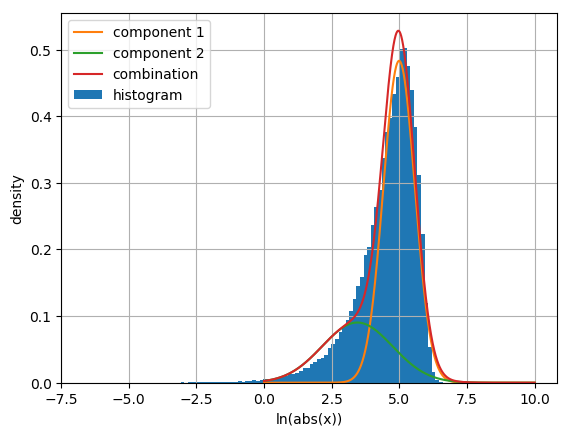

In [10]:
plt.hist(log.(abs.(x)), bins=100, density=true, label="histogram")
plt.plot(0:0.01:10, πi[1]*Gaussian(0:0.01:10, μ[1], σ[1]), label="component 1")
plt.plot(0:0.01:10, πi[2]*Gaussian(0:0.01:10, μ[2], σ[2]), label="component 2")
plt.plot(0:0.01:10, πi[1]*Gaussian(0:0.01:10, μ[1], σ[1]) + πi[2]*Gaussian(0:0.01:10, μ[2], σ[2]), label="combination")
plt.xlabel("ln(abs(x))")
plt.ylabel("density")
plt.legend()
plt.grid()
;

## μ-law companding

$$ f(x) = sgn(x) \frac{\ln(1+\mu|x|))}{\ln(1+\mu)} \qquad -1 \leq x \leq 1$$

$$ f^{-1}(x) = sgn(x) (1/\mu) ((1+\mu)^{|x|}-1) $$

In [11]:
function μ_law_companding(x, μ)
    return sign.(x) .* log.(1 .+ μ*abs.(x)) / log(1 + μ)
end

function μ_law_expansion(x, μ)
    return sign.(x) .* (1 / μ) .* ( (1 .+ μ).^abs.(x) .- 1 )
end
;

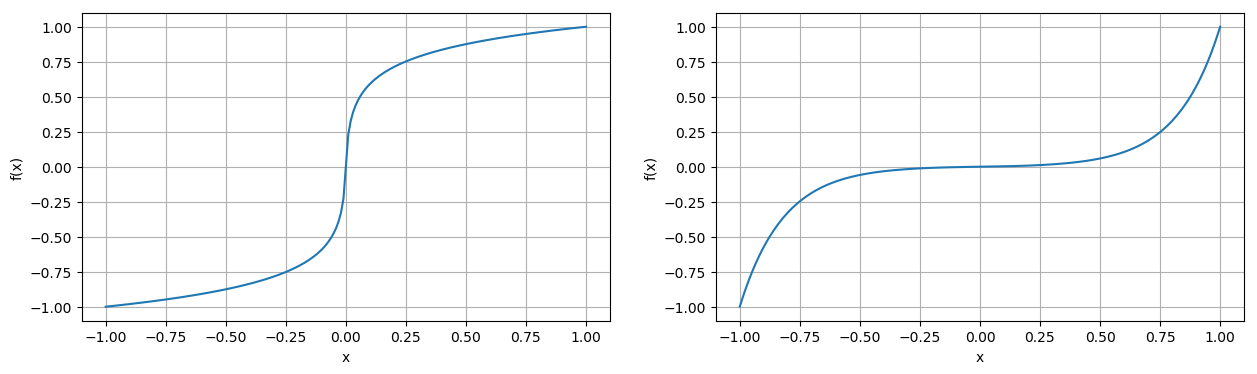

In [12]:
_, ax = plt.subplots(ncols=2, figsize=(15,4))

ax[1].plot(-1:0.01:1, μ_law_companding(-1:0.01:1, 255)), ax[1].grid(), ax[1].set_xlabel("x"), ax[1].set_ylabel("f(x)")
ax[2].plot(-1:0.01:1, μ_law_expansion(-1:0.01:1, 255)), ax[2].grid(), ax[2].set_xlabel("x"), ax[2].set_ylabel("f(x)")
;

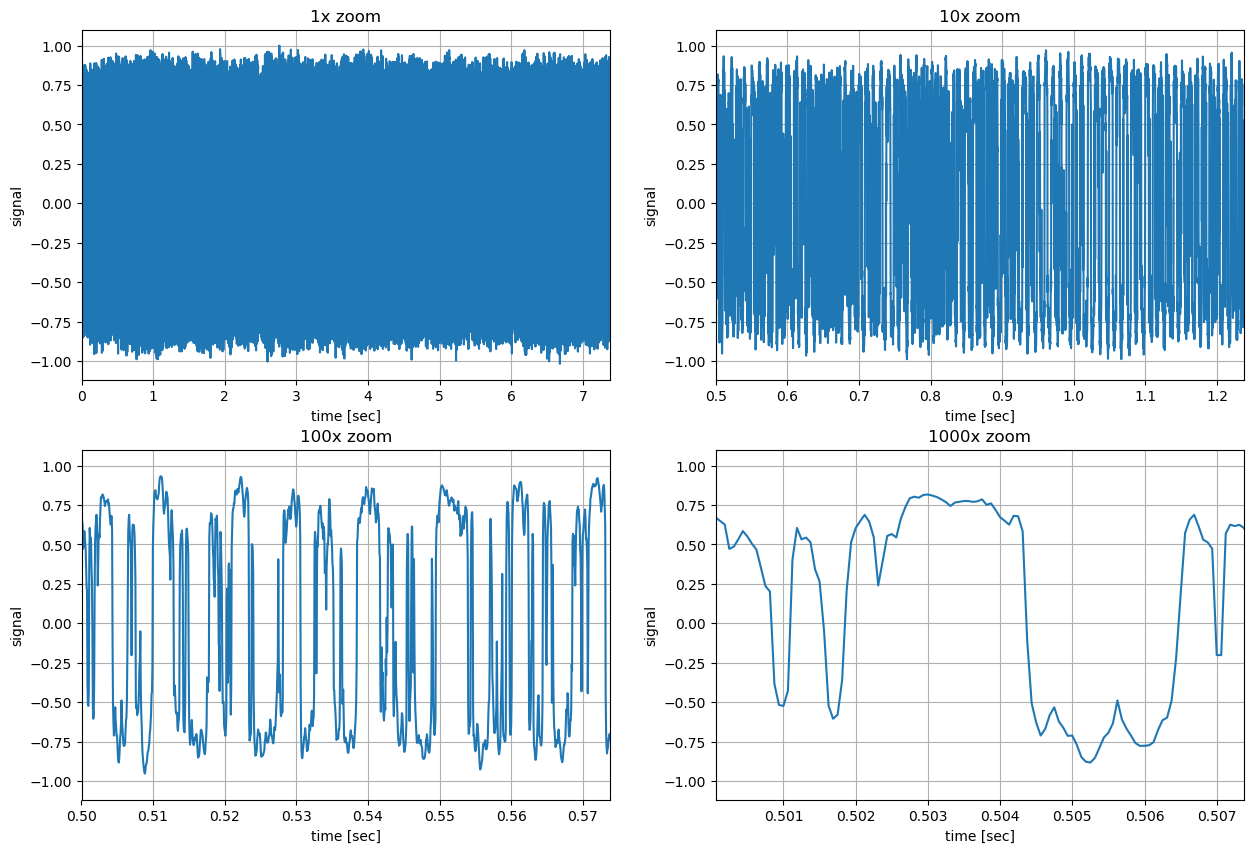

In [13]:
# calculate μ_law
x_μ = μ_law_companding(x./maximum(x), 255)

_, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,10))

ax[1,1].plot(t, x_μ), ax[1,1].set_xlim(minimum(t), maximum(t)), ax[1,1].set_title("1x zoom"), ax[1,1].set_xlabel("time [sec]"), ax[1,1].set_ylabel("signal"), ax[1,1].grid()
ax[1,2].plot(t, x_μ), ax[1,2].set_xlim(minimum(t)+0.5, maximum(t)/10+0.5), ax[1,2].set_title("10x zoom"), ax[1,2].set_xlabel("time [sec]"), ax[1,2].set_ylabel("signal"), ax[1,2].grid()
ax[2,1].plot(t, x_μ), ax[2,1].set_xlim(minimum(t)+0.5, maximum(t)/100+0.5), ax[2,1].set_title("100x zoom"), ax[2,1].set_xlabel("time [sec]"), ax[2,1].set_ylabel("signal"), ax[2,1].grid()
ax[2,2].plot(t, x_μ), ax[2,2].set_xlim(minimum(t)+0.5, maximum(t)/1000+0.5), ax[2,2].set_title("1000x zoom"), ax[2,2].set_xlabel("time [sec]"), ax[2,2].set_ylabel("signal"), ax[2,2].grid()
;

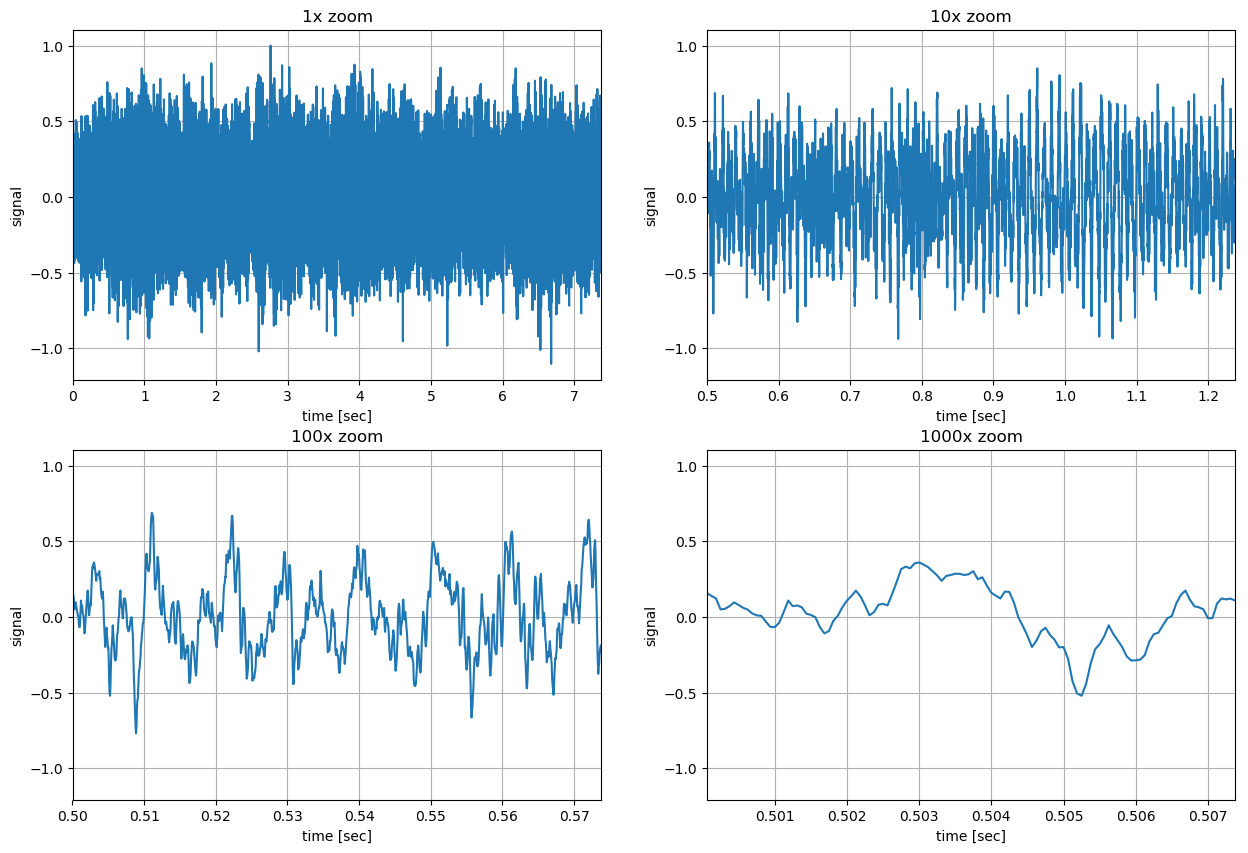

In [14]:
# check whether inverse works
x = μ_law_expansion(x_μ, 255)

_, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,10))

ax[1,1].plot(t, x), ax[1,1].set_xlim(minimum(t), maximum(t)), ax[1,1].set_title("1x zoom"), ax[1,1].set_xlabel("time [sec]"), ax[1,1].set_ylabel("signal"), ax[1,1].grid()
ax[1,2].plot(t, x), ax[1,2].set_xlim(minimum(t)+0.5, maximum(t)/10+0.5), ax[1,2].set_title("10x zoom"), ax[1,2].set_xlabel("time [sec]"), ax[1,2].set_ylabel("signal"), ax[1,2].grid()
ax[2,1].plot(t, x), ax[2,1].set_xlim(minimum(t)+0.5, maximum(t)/100+0.5), ax[2,1].set_title("100x zoom"), ax[2,1].set_xlabel("time [sec]"), ax[2,1].set_ylabel("signal"), ax[2,1].grid()
ax[2,2].plot(t, x), ax[2,2].set_xlim(minimum(t)+0.5, maximum(t)/1000+0.5), ax[2,2].set_title("1000x zoom"), ax[2,2].set_xlabel("time [sec]"), ax[2,2].set_ylabel("signal"), ax[2,2].grid()
;

## Plot signal distribution

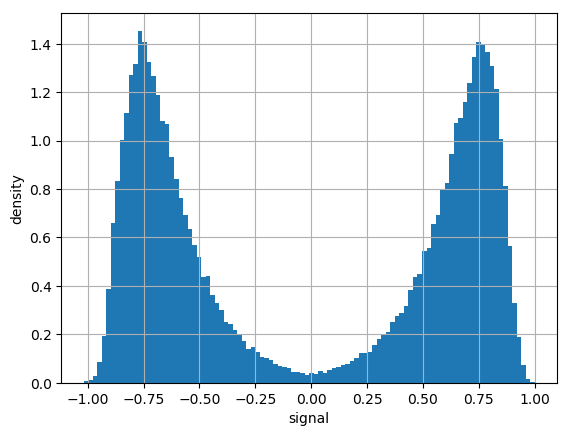

In [15]:
# plot histogram of speech signal
plt.hist(x_μ, bins=100, density=true, label="histogram"), plt.grid(), plt.xlabel("signal"), plt.ylabel("density")
;

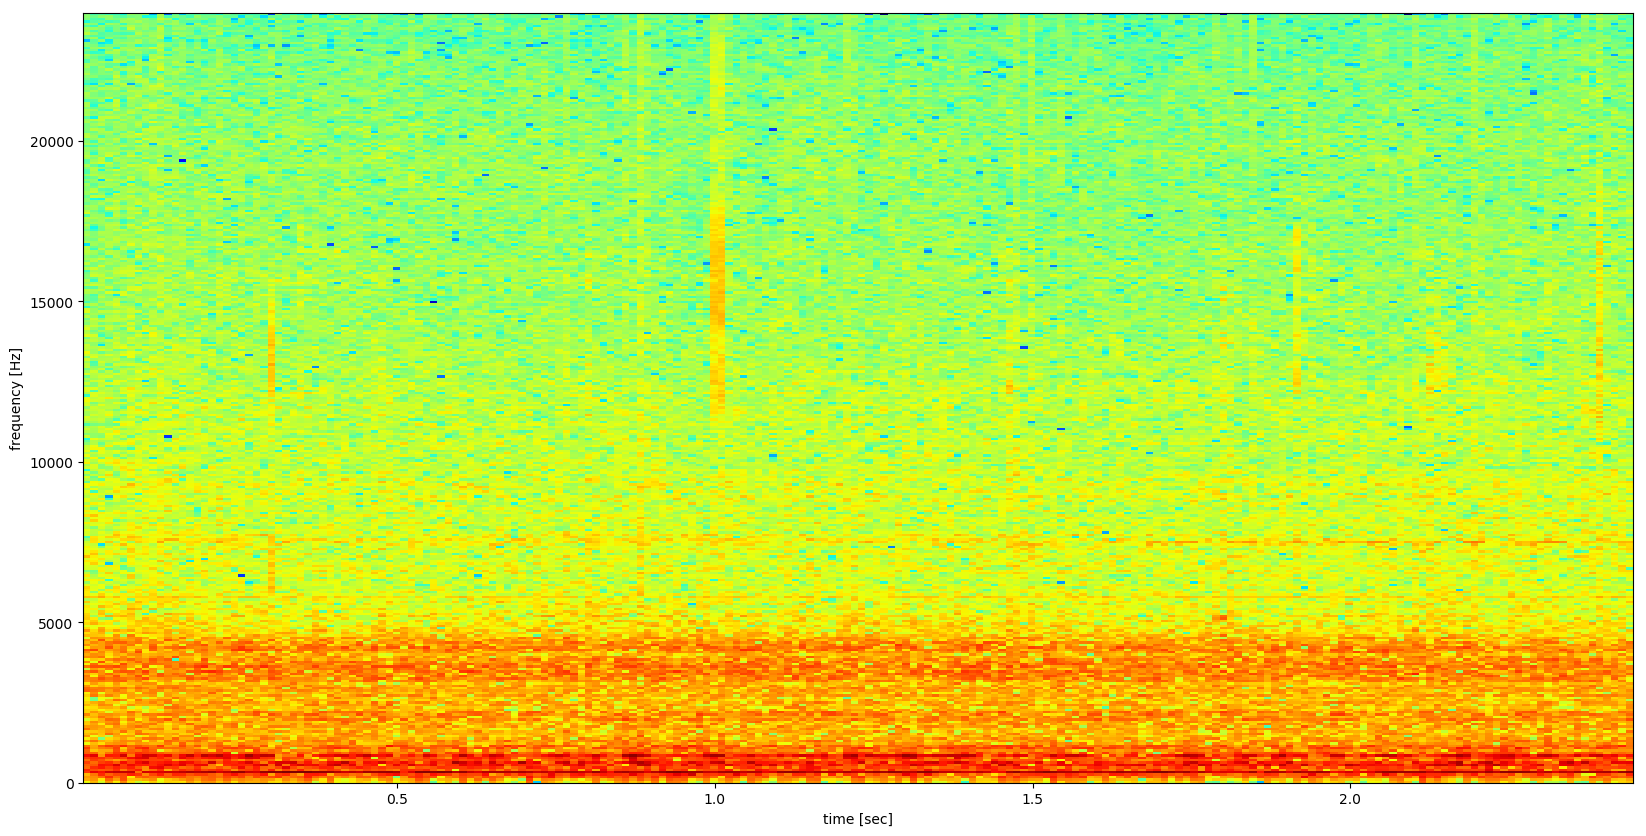

In [16]:
plt.figure(figsize=(20,10))
plot_spectrogram(spectrogram(x, 640, 80, fs=fs), fs)
plt.clim(-14, -3)

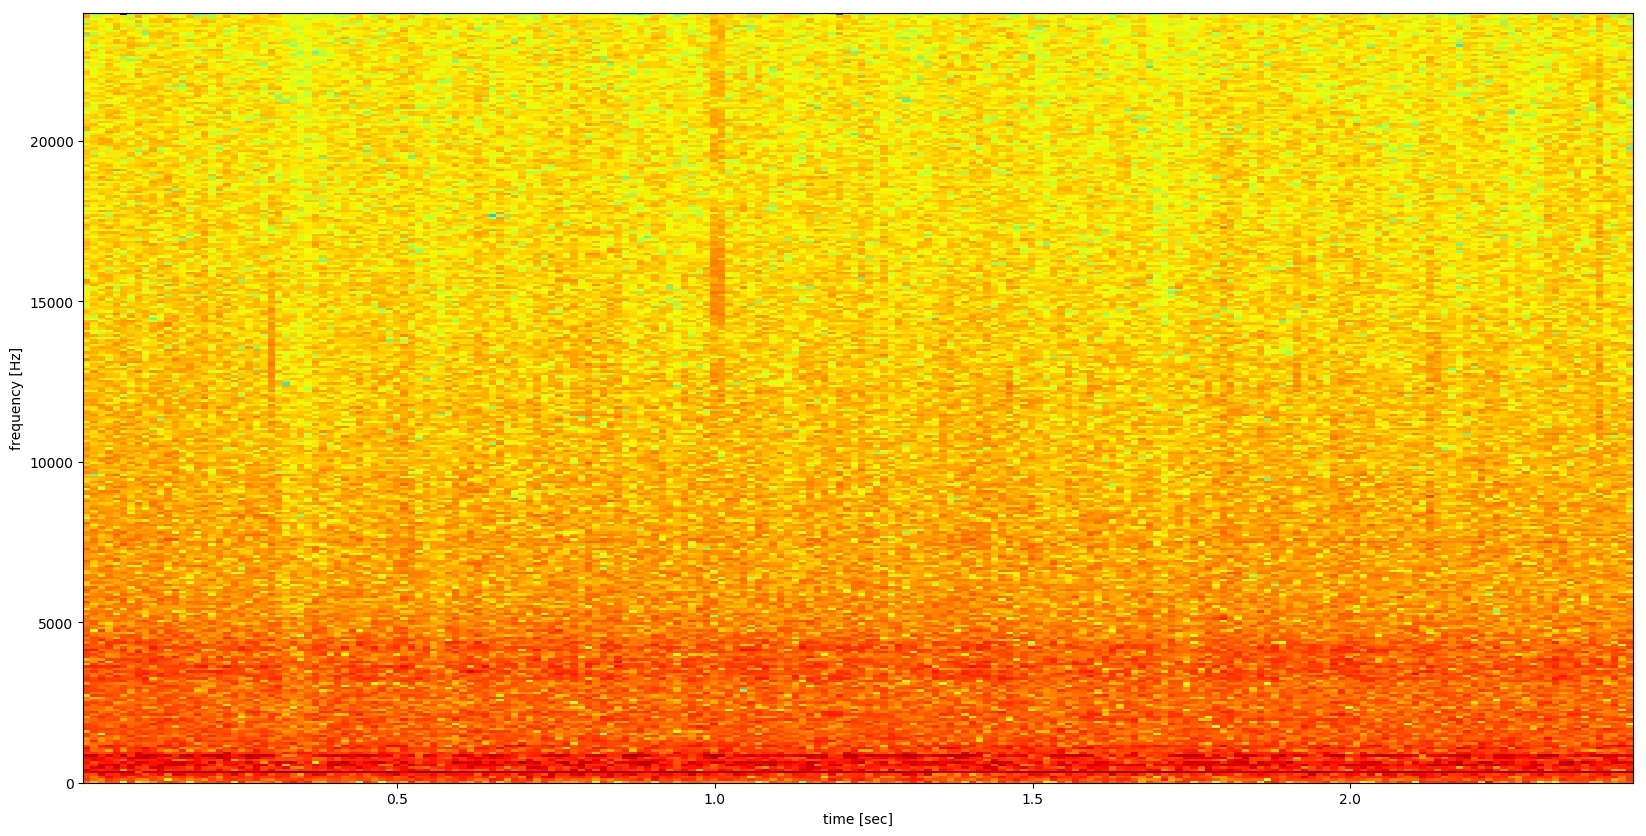

In [17]:
plt.figure(figsize=(20,10))
plot_spectrogram(spectrogram(x_μ, 640, 80, fs=fs), fs)
#plt.clim(-15, -4)
;

In [18]:
fx = FFTovertime(x, 640, 80, rectangularwindow)
fs_μ = FFTovertime(x_μ, 640, 80, rectangularwindow)
;

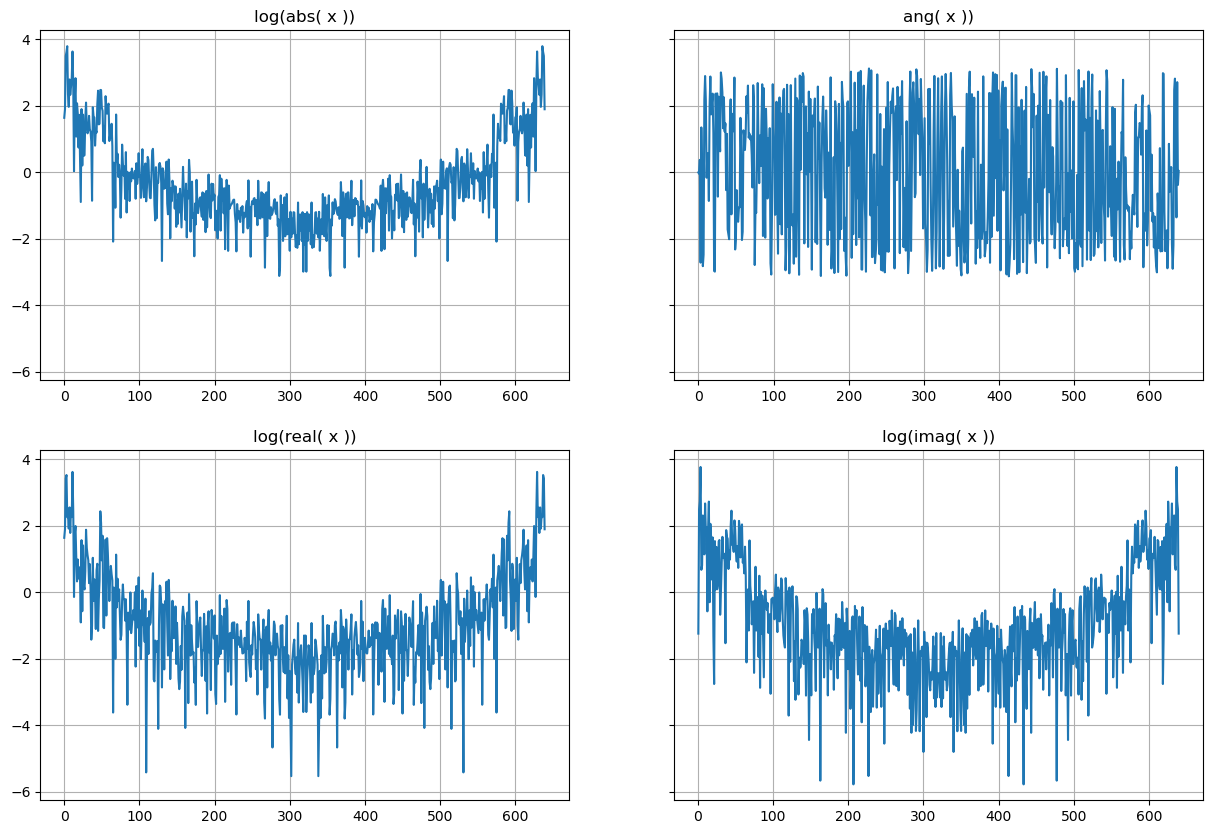

PyObject Text(0.5, 1.0, 'log(imag( x ))')

In [19]:
tplot = 64
_, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,10), sharey=true)
ax[1,1].plot(log.(abs.(fx[tplot,:]))), 
ax[1,2].plot(angle.(fx[tplot,:]))
ax[2,1].plot(log.(abs.(real.(fx[tplot,:]))))
ax[2,2].plot(log.(abs.(imag.(fx[tplot,:]))))
ax[1,1].grid(), ax[1,2].grid(), ax[2,1].grid(), ax[2,2].grid()
ax[1,1].set_title("log(abs( x ))")
ax[1,2].set_title("ang( x ))")
ax[2,1].set_title("log(real( x ))")
ax[2,2].set_title("log(imag( x ))")


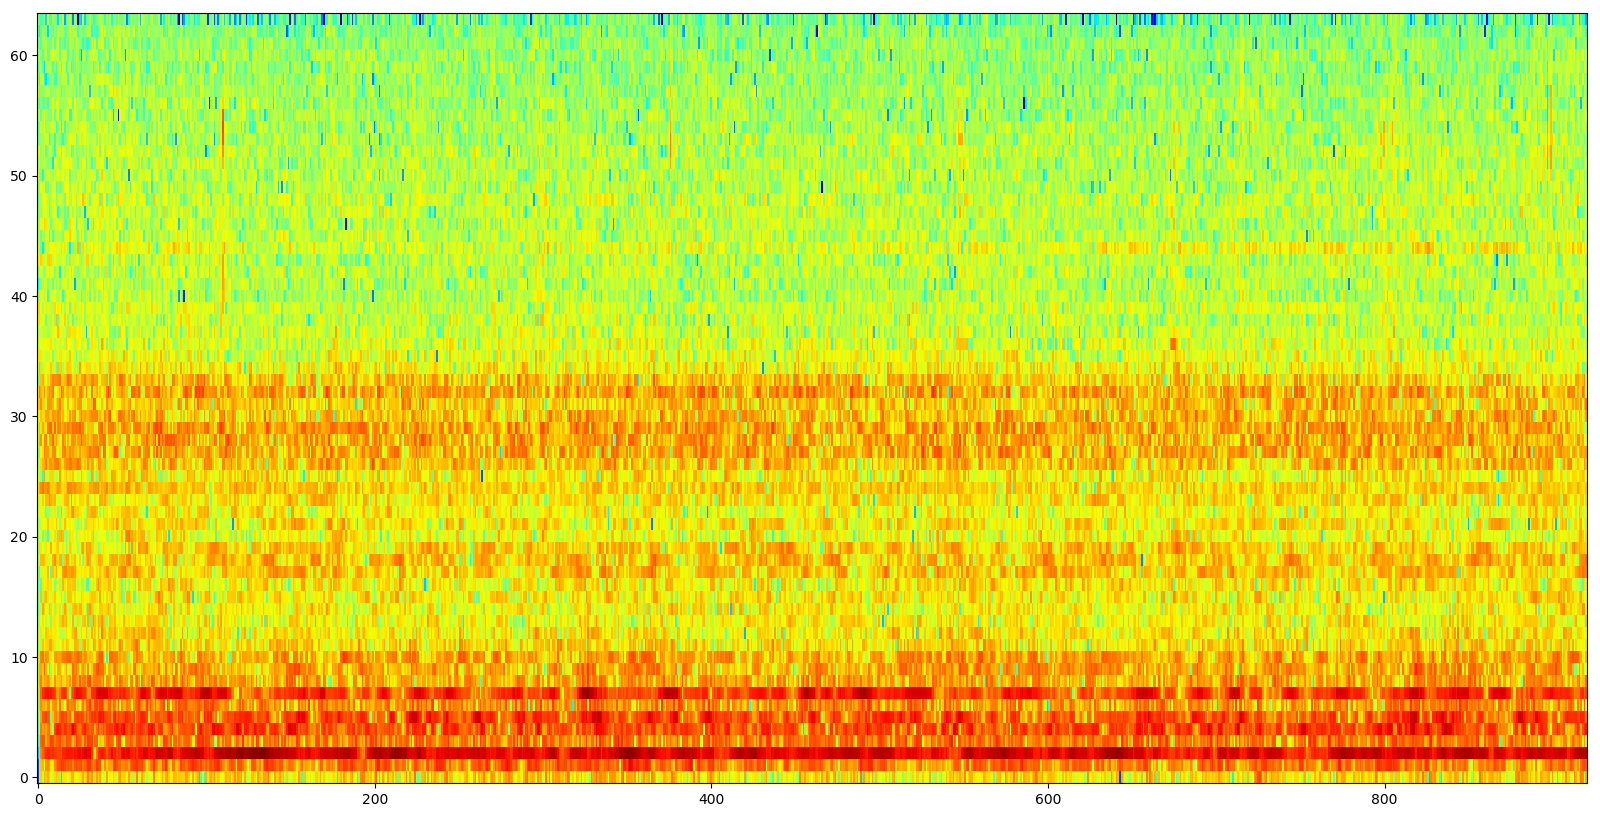

PyObject <matplotlib.image.AxesImage object at 0x0000000062653860>

In [20]:
fwx = warp_fft(x, 0.5756, 128, step_size=128)
plt.figure(figsize=(20,10))
imshow(log.(abs.(twosided2singlesided(fwx)))',
    aspect="auto",
               cmap="jet",
               origin="lower")
              # extent=[ last(spec.time), last(spec.freq), first(spec.freq)])

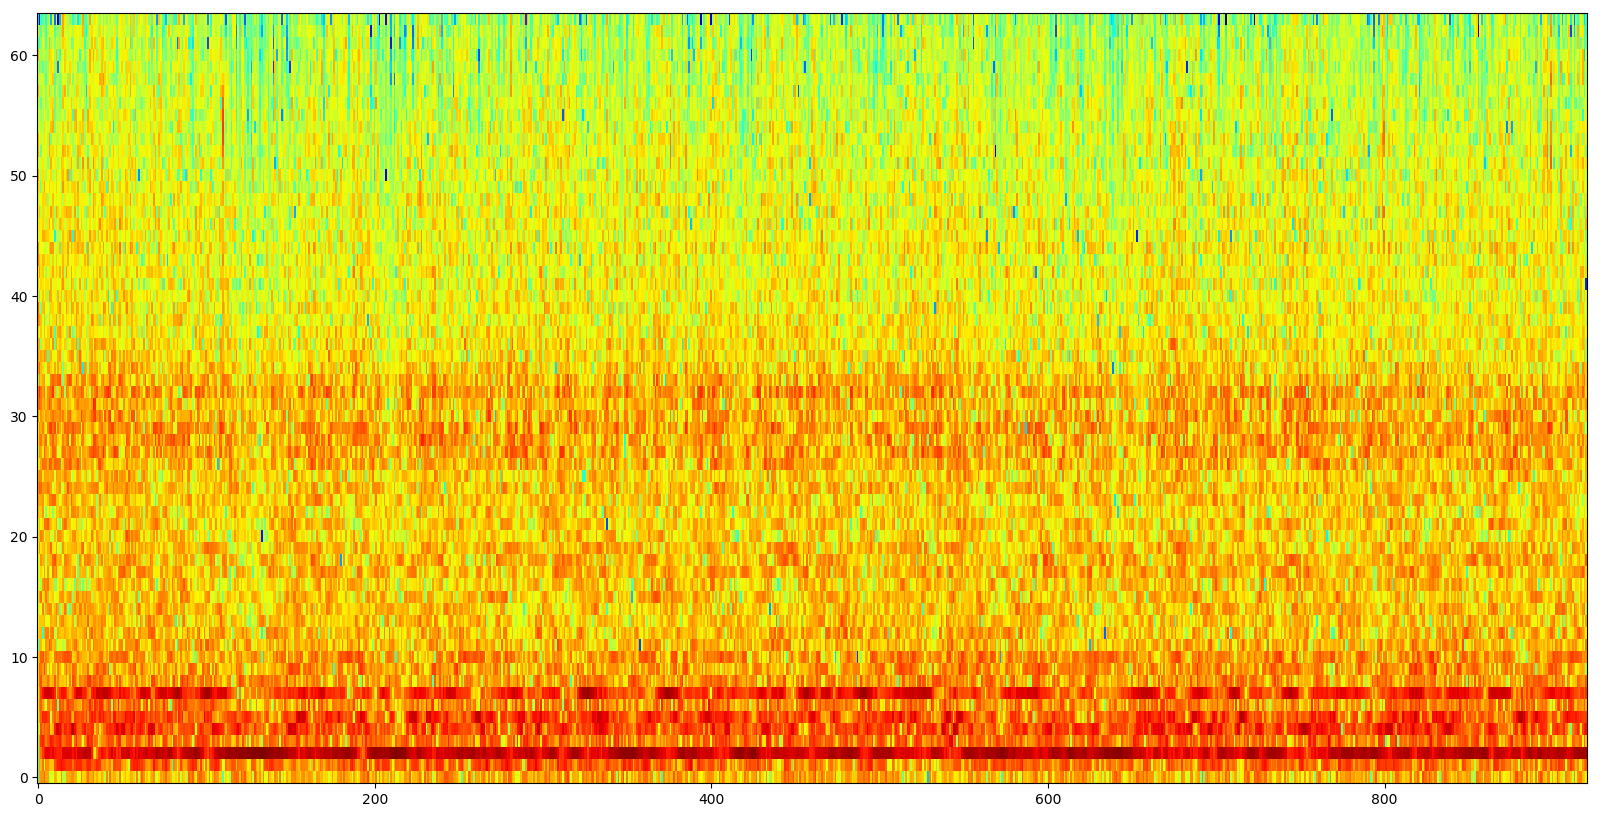

PyObject <matplotlib.image.AxesImage object at 0x00000000625FD2B0>

In [21]:
fwx_μ = warp_fft(x_μ, 0.5756, 128, step_size=128)
plt.figure(figsize=(20,10))
imshow(log.(abs.(twosided2singlesided(fwx_μ)))',
    aspect="auto",
               cmap="jet",
               origin="lower")
              # extent=[ last(spec.time), last(spec.freq), first(spec.freq)])